**Importing All Necessary Libraries:**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

<ipython-input-68-1c46b1a3e398>:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


**Import and read the dataset**

In [12]:
import json

with open('/content/fashion_products_dataset.json') as f:
    data = json.load(f)

In [13]:
for entry in data:
    print(entry)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
dataset = [
    {'_id': 'fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a', 'actual_price': '2,999', 'average_rating': '3.9', 'brand': 'York', 'category': 'Clothing and Accessories', 'crawled_at': '02/10/2021, 20:11:51', 'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India', 'discount': '69% off', 'images': ['https://rukminim1.flixcart.com/image/128/128/jr3t5e80/track-pant/z/y/n/m-1005combo2-yorker-original-imafczg3xfh5qqd4.jpeg?q=70', 'https://rukminim1.flixcart.com/image/128/128/jr58l8w0/track-pant/w/d/a/l-1005combo8-yorker-original-imafczg3pgtxgraq.jpeg?q=70'], 'out_of_stock': False, 'pid': 'TKPFCZ9EA7H5FYZH', 'product_details': [{'Style Code': '1005COMBO2'}, {'Closure': 'Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Multicolor'}], 'seller': 'Shyam Enterprises', 'selling_price': '921', 'sub_category': 'Bottomwear', 'title': 'Solid Men Multicolor Track Pants', 'url': 'https://www.flipkart.com/yorker-solid-men-multicolor-track-pants/p/itmd2c76aadce459?pid=TKPFCZ9EA7H5FYZH&lid=LSTTKPFCZ9EA7H5FYZHVYXWP0&marketplace=FLIPKART&srno=b_1_1&otracker=browse&fm=organic&iid=177a46eb-d053-4732-b3de-fcad6ff59cbd.TKPFCZ9EA7H5FYZH.SEARCH&ssid=utkd4t3gb40000001612415717799'},
    {'_id': '893e6980-f2a0-531f-b056-34dd63fe912c', 'actual_price': '1,499', 'average_rating': '3.9', 'brand': 'York', 'category': 'Clothing and Accessories', 'crawled_at': '02/10/2021, 20:11:52', 'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India', 'discount': '66% off', 'images': ['https://rukminim1.flixcart.com/image/128/128/kfyasnk0/track-pant/g/5/y/s-19876-yorker-original-imafwamyzrwjynkf.jpeg?q=70', 'https://rukminim1.flixcart.com/image/128/128/kfyasnk0/track-pant/g/5/y/s-19876-yorker-original-imafwamynyeuu5zq.jpeg?q=70'], 'out_of_stock': False, 'pid': 'TKPFCZ9EJZV2UVRZ', 'product_details': [{'Style Code': '1005BLUE'}, {'Closure': 'Drawstring, Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Blue'}], 'seller': 'Shyam Enterprises', 'selling_price': '499', 'sub_category': 'Bottomwear', 'title': 'Solid Men Blue Track Pants', 'url': 'https://www.flipkart.com/yorker-solid-men-blue-track-pants/p/itmfczez7v6rzwer?pid=TKPFCZ9EJZV2UVRZ&lid=LSTTKPFCZ9EJZV2UVRZ9HEITU&marketplace=FLIPKART&srno=b_1_2&otracker=browse&fm=organic&iid=177a46eb-d053-4732-b3de-fcad6ff59cbd.TKPFCZ9EJZV2UVRZ.SEARCH&ssid=utkd4t'
    }
]

# Print each item in the dataset
for item in dataset:
    print(item)


{'_id': 'fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a', 'actual_price': '2,999', 'average_rating': '3.9', 'brand': 'York', 'category': 'Clothing and Accessories', 'crawled_at': '02/10/2021, 20:11:51', 'description': 'Yorker trackpants made from 100% rich combed cotton giving it a rich look.Designed for Comfort,Skin friendly fabric,itch-free waistband & great for all year round use Proudly made in India', 'discount': '69% off', 'images': ['https://rukminim1.flixcart.com/image/128/128/jr3t5e80/track-pant/z/y/n/m-1005combo2-yorker-original-imafczg3xfh5qqd4.jpeg?q=70', 'https://rukminim1.flixcart.com/image/128/128/jr58l8w0/track-pant/w/d/a/l-1005combo8-yorker-original-imafczg3pgtxgraq.jpeg?q=70'], 'out_of_stock': False, 'pid': 'TKPFCZ9EA7H5FYZH', 'product_details': [{'Style Code': '1005COMBO2'}, {'Closure': 'Elastic'}, {'Pockets': 'Side Pockets'}, {'Fabric': 'Cotton Blend'}, {'Pattern': 'Solid'}, {'Color': 'Multicolor'}], 'seller': 'Shyam Enterprises', 'selling_price': '921', 'sub_category': 'Bott

In [15]:
import pandas as pd

# Read the JSON file
data = pd.read_json(r'/content/fashion_products_dataset.json')

# Explore the data structure
print(data.head())

                                    _id actual_price average_rating brand  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999            3.9  York   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499            3.9  York   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999            3.9  York   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999            3.9  York   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999            3.9  York   

                   category          crawled_at  \
0  Clothing and Accessories 2021-02-10 20:11:51   
1  Clothing and Accessories 2021-02-10 20:11:52   
2  Clothing and Accessories 2021-02-10 20:11:52   
3  Clothing and Accessories 2021-02-10 20:11:53   
4  Clothing and Accessories 2021-02-10 20:11:53   

                                         description discount  \
0  Yorker trackpants made from 100% rich combed c...  69% off   
1  Yorker trackpants made from 100% rich combed c...  66% off   
2  Yorker trackpants made from 100%

In [16]:
from google.colab import data_table
import pandas as pd

# Enable DataFrame formatter
data_table.enable_dataframe_formatter()

# Read the JSON file into a DataFrame
data = pd.read_json(r'/content/fashion_products_dataset.json')

# Rearrange the DataFrame as needed
# For example, you can sort the DataFrame by a specific column
data_sorted = data.sort_values(by='description')

# Display the rearranged dataset using data_table
data_table.DataTable(data_sorted)

# Display the rearranged dataset using data_table, limiting to the first 1000 rows
data_table.DataTable(data_sorted.head(2000))


Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Handle missing values
data.fillna(value='N/A', inplace=True)

In [18]:
# Normalize the data
normalized_data = pd.json_normalize(data)

In [19]:
# Convert columns with lists to strings
data_str = data.astype(str)

# Check for duplicates in the DataFrame
duplicate_rows = data_str.duplicated()

# Print the duplicate rows
print(data_str[duplicate_rows])


Empty DataFrame
Columns: [_id, actual_price, average_rating, brand, category, crawled_at, description, discount, images, out_of_stock, pid, product_details, seller, selling_price, sub_category, title, url]
Index: []


In [23]:
data_str.to_csv('/content/fashion_products_dataset.csv', index=False)

In [24]:
df = pd.read_csv('/content/fashion_products_dataset.csv')

<ipython-input-24-043db021b79d>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/fashion_products_dataset.csv')


In [29]:
df.head(2)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...


In [31]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35447 entries, 0 to 35446
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              35447 non-null  object
 1   actual_price     34584 non-null  object
 2   average_rating   33001 non-null  object
 3   brand            33379 non-null  object
 4   category         35447 non-null  object
 5   crawled_at       35447 non-null  object
 6   description      18017 non-null  object
 7   discount         29059 non-null  object
 8   images           30000 non-null  object
 9   out_of_stock     30000 non-null  object
 10  pid              30000 non-null  object
 11  product_details  29999 non-null  object
 12  seller           28258 non-null  object
 13  selling_price    29997 non-null  object
 14  sub_category     29999 non-null  object
 15  title            29999 non-null  object
 16  url              29999 non-null  object
dtypes: object(17)
memory usage: 4.6

In [32]:
Uniquebrand = df['brand'].unique()

In [50]:
df['brand'].fillna(0, inplace=True)

In [51]:
Uniquebrand

array(['York', 'ANGI', nan, 'Man', 'TRANSPERAN', 'DISCOUNT OUTL',
       'adidas Origina', 'Fresh Fe', 'SayItLo', 'ShreeR', 'Fairdea',
       'Jagdish Garmen', 'Jack Roy', 'SMART ATTRACTI', 'Jai Textil',
       'Solid Styl', 'Clo', 'n', 'BOYT', 'CA', 'A J STYL', 'K M',
       'Bindass Bo', 'Linsd', 'wangjia', 'REEB', 'Fashion Dre',
       'Indian M', 'PIS', 'Platin', 'INTER CREATI', 'TSHIRT.ind.', 'AXMA',
       'REF', 'Zack Fo', 'MagMatri', 'SEVN', 'Jaso', 'Ziko',
       'IFG Collecti', 'Crocks Cl', 'Vector', 'PEEP', 'limited colou',
       'shree khodaldh', 'Mylifestylebazz', 'Cher', 'VOXA', 'Kt Kun',
       'LOUIS MONAR', 'FOREVER YOU', 'mark morp', 'Simon Rob',
       'VIRALEE RETA', 'U.S. Polo Ass', 'U.S.Polo As', 'U.S. POLO ASS',
       'Shoef', 'Bone', 'Vibrant Vestu', 'LDHSA', 'ARBIA FUN', 'fas',
       'FASHION WOU', 'ModeWa', 'Black Bull Design Stud',
       'SATDEVANGIKHADIBHAND', 'TEEF', 'M7 By Metrona', 'Wab',
       'A to Z life sty', 'Reliable Ca', 'Disn', 'East I', 'MIL

In [34]:
len(Uniquebrand)

326

In [35]:
UniqueCategory = df['category'].unique()

In [36]:
UniqueCategory

array(['Clothing and Accessories', 'Bags, Wallets & Belts', 'Footwear',
       'Toys', 'SOCDZAN8X52NZTZN'], dtype=object)

In [37]:
len(UniqueCategory)

5

In [46]:
UniqueSub_category =df['sub_category'].unique()

In [47]:
UniqueSub_category

array(['Bottomwear', 'Clothing Accessories', 'Winter Wear', 'Raincoats',
       'Topwear', 'Innerwear and Swimwear',
       'Kurtas, Ethnic Sets and Bottoms', 'Blazers, Waistcoats and Suits',
       'Tracksuits', 'Sleepwear', 'SUNSHOPPING Bags, Wallets & Belts',
       'Sunshopping Bags, Wallets & Belts',
       'Crocks Club Clothing and Accessories', "Men's Footwear",
       'Fabrics', 'Inspire Clothing and Accessories',
       'INSPIRE Clothing and Accessories',
       'Winsome Deal Bags, Wallets & Belts',
       'Roy Clothing and Accessories', 'YOFAMA Bags, Wallets & Belts',
       'Party Supplies', 'Brand Trunk Bags, Wallets & Belts',
       'mentiezi Bags, Wallets & Belts',
       'Uber Urban Clothing and Accessories', 0], dtype=object)

In [45]:
df['sub_category'].fillna(0, inplace=True)

In [54]:
df['Date'] = pd.to_datetime(df['crawled_at'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,Date
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,02/10/2021
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,02/10/2021
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,02/10/2021
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,02/10/2021
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...,02/10/2021


In [55]:
df.drop(columns=['crawled_at'], inplace=True)

In [56]:
df.head(2)

,_id,actual_price,average_rating,brand,category,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url,Date
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,69% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...,02/10/2021
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,Yorker trackpants made from 100% rich combed c...,66% off,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...,02/10/2021


In [57]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'description', 'discount', 'images', 'out_of_stock', 'pid',
       'product_details', 'seller', 'selling_price', 'sub_category', 'title',
       'url', 'Date'],
      dtype='object')

In [98]:
# Convert relevant columns to numeric data types
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

# Group by 'Date' and calculate mean of numeric columns
data_date = df.groupby('Date').agg({'actual_price': 'mean', 'average_rating': 'mean', 'discount': 'mean', 'selling_price': 'mean'})

# Sort the resulting DataFrame by date
data_date = data_date.sort_index()


In [99]:
for index, row in data_date.iterrows():
    print(f"Date: {index}")
    print(f"Mean Actual Price: {row['actual_price']}")
    print(f"Mean Average Rating: {row['average_rating']}")
    print(f"Mean Selling Price: {row['selling_price']}")
    print()


Date: 02/10/2021
Mean Actual Price: 800.5977961432507
Mean Average Rating: 3.6274011747896493
Mean Selling Price: 542.416624084483

Date: 02/11/2021
Mean Actual Price: 628.5719402985075
Mean Average Rating: 3.645288236545416
Mean Selling Price: 522.6814598168871



<ipython-input-105-c39e778cc27c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='actual_price', data=mean_actual_price, palette='PuRd')


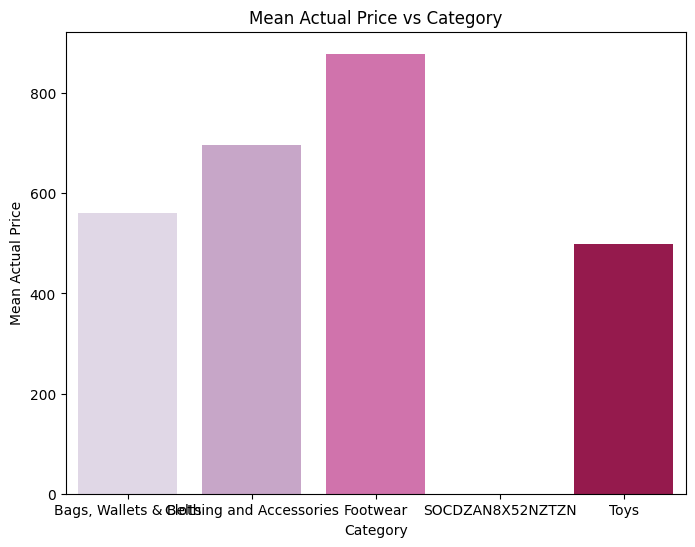

In [105]:
# Group the data by 'category' and calculate the mean of 'actual_price' and 'selling_price' for each category
mean_actual_price = df.groupby('category')['actual_price'].mean().reset_index()
# Plot 'actual_price' vs 'category'
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='actual_price', data=mean_actual_price, palette='PuRd')
plt.title('Mean Actual Price vs Category')
plt.xlabel('Category')
plt.ylabel('Mean Actual Price')
plt.show()

<ipython-input-101-d454429b0e1b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='selling_price', data=mean_selling_price, palette='viridis')


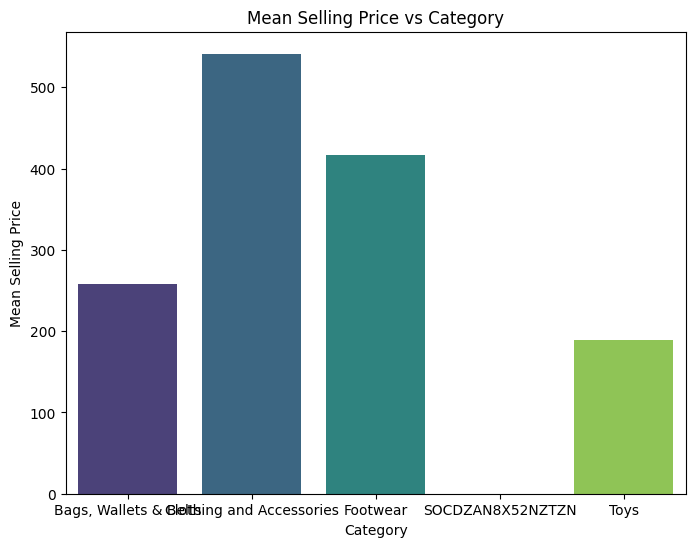

In [101]:
mean_selling_price = df.groupby('category')['selling_price'].mean().reset_index()
# Plot 'selling_price' vs 'category'
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='selling_price', data=mean_selling_price, palette='viridis')
plt.title('Mean Selling Price vs Category')
plt.xlabel('Category')
plt.ylabel('Mean Selling Price')
plt.show()

<ipython-input-104-84d1ac08daea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sub_category', y='average_rating', data=mean_average_rating, palette='plasma')


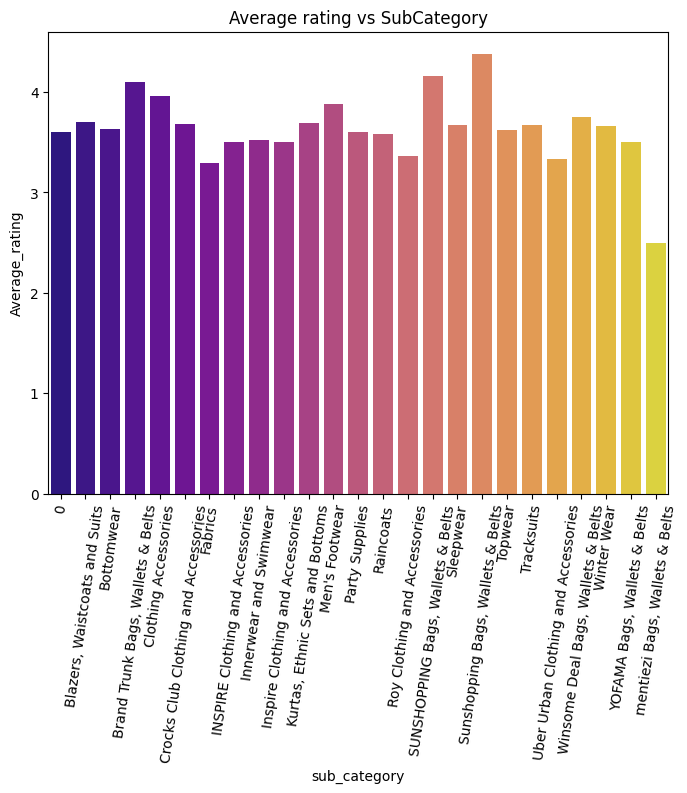

In [104]:
mean_average_rating = df.groupby('sub_category')['average_rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.xticks(rotation = 82)
sns.barplot(x='sub_category', y='average_rating', data=mean_average_rating, palette='plasma')
plt.title('Average rating vs SubCategory')
plt.xlabel('sub_category')
plt.ylabel('Average_rating')
plt.show()

<ipython-input-103-bedbab9ba4a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


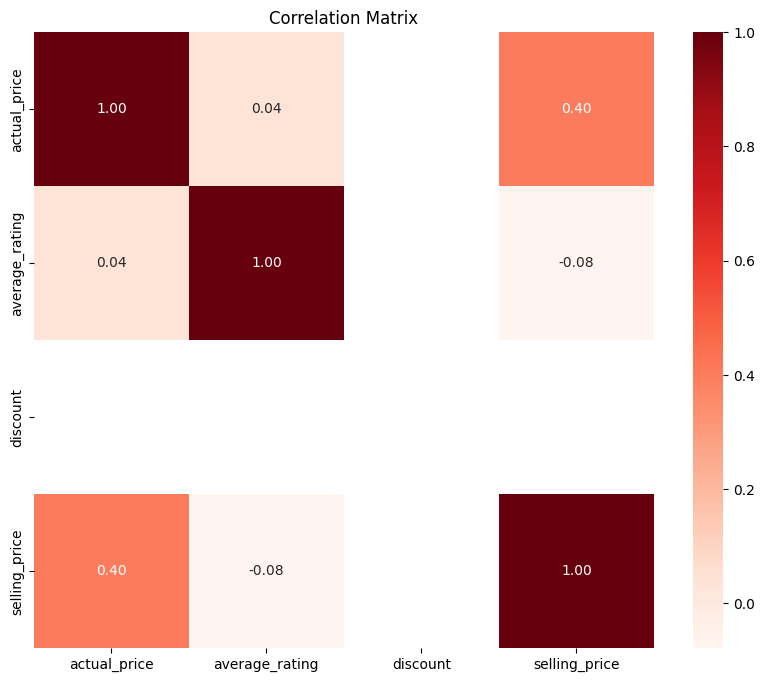

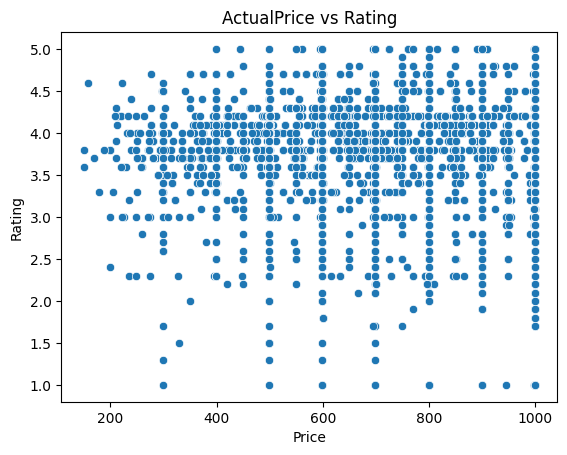

In [103]:
# 1. Calculate correlation coefficients
correlation_matrix = df.corr()

# 2. Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 3. Explore relationships with scatter plots
sns.scatterplot(x='actual_price', y='average_rating', data=df)
plt.title('ActualPrice vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [85]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'description', 'discount', 'images', 'out_of_stock', 'pid',
       'product_details', 'seller', 'selling_price', 'sub_category', 'title',
       'url', 'Date'],
      dtype='object')